# Assignment 1: Barotropic Vorticity

By: Ty Janoski

#### 1) Re-derive the barotropic vorticity budget for a non-flat ocean bottom.

Begin with planetary-geostrophic horizontal momentum equation for a Boussinesq fluid:

$$ \vec{f} \times \vec{u} = -\nabla\phi + \frac{1}{\rho_0}\frac{\partial{\vec{\tau}}}{\partial{z}}$$

Next, take the curl of both sides:

$$ \vec{f}\nabla \cdotp \vec{u} + \frac{\partial{f}}{\partial{y}}v = curl_z(\frac{\partial{\vec{\tau}}}{\partial{z}})$$

We vertically integrate, but with a non-flat bottom ocean floor, the bounds of our integration are different. We define the orography of the ocean floor as a new variable, $\eta_B$. Therefore, the lower bound of integration would be $-H + \eta_B$, where $H$ is some flat surface that represents the average ocean depth from which $\eta_B$ is the variation in. As before, $\eta$ is the sea surface height.

$$ -f \int_{-H+\eta_B}^{\eta}\nabla\cdotp\vec{u} + \beta\int_{-H+\eta_B}^{\eta}v dz = curl_z(\int_{-H+\eta_B}^{\eta}\frac{\partial{\vec{\tau}}}{\partial{z}})$$

Using continuity, we can instead write:

$$ -f \int_{-H+\eta_B}^{\eta}\frac{\partial{w}}{\partial{z}} + \beta\int_{-H+\eta_B}^{\eta}v dz = curl_z(\int_{-H+\eta_B}^{\eta}\frac{\partial{\vec{\tau}}}{\partial{z}})$$

Integrating:

$$ -f(w\rvert_{z=\eta})+f(w\rvert_{z=-H+\eta_B}) + \beta V = curl_z(\vec{\tau}_S - \vec{\tau}_B)$$

The first time on the lefthand side, the vertical velocity at the sea surface, is negligibly small because variations in $\eta$ are extremely small. However, we cannot do the same for the vertical velocity at the ocean floor because of the variations in $\eta_B$. Instead, we relate the vertical velocity to the slope of the ocean floor

$$ w\rvert_{z=-H+\eta_B}=\frac{D\eta_B}{Dt} = \frac{\partial{\eta_B}}{\partial{t}} + \vec{u} \cdotp\nabla\eta_B$$

Obviously, the sea floor is not changing in time. Therefore, we have:

$$ \beta V + f\vec{u}\cdotp\nabla\eta_B = curl_z(\vec{\tau}_S-\vec{\tau}_B) $$

If we want to use the stommel model:

$$ \beta\frac{\partial{\psi}}{\partial{x}} + f\vec{u}\cdotp\nabla\eta_B = curl_z({\vec{\tau}}_S) - r\nabla^2\psi$$

#### 2) Calculate the Stommel solution in the MITgcm tutorial_barotropic_gyre simulation and compare it to the full solution. Use the standard wind stress (0.1 N/m^2)  and also a double-strength wind stress (0.2 N/m^2). You will have to figure out how to write an appropriately formatted binary file.

In [2]:
# Import statements:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import hvplot.xarray
import xmitgcm
xmitgcm.file_utils.clear_cache()

In [7]:
# read in mitgcm output and look at it

rundir = '/rigel/ocp/users/janoski/tutorial_barotropic_gyre/run/'
ds = xmitgcm.open_mdsdataset(rundir, iters=72*np.arange(1,201),
                             delta_t=1200, calendar='360_day', ref_date='0000-01-01 00:00:00')
ds

/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
op

<xarray.Dataset>
Dimensions:   (XC: 62, XG: 62, YC: 62, YG: 62, Z: 1, Zl: 1, Zp1: 2, Zu: 1, time: 200)
Coordinates:
  * XC        (XC) >f4 -10000.0 10000.0 30000.0 ... 1190000.0 1210000.0
  * YC        (YC) >f4 -10000.0 10000.0 30000.0 ... 1190000.0 1210000.0
  * XG        (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * YG        (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * Z         (Z) >f4 -2500.0
  * Zp1       (Zp1) >f4 0.0 -5000.0
  * Zu        (Zu) >f4 -5000.0
  * Zl        (Zl) >f4 0.0
    rA        (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dxG       (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dyG       (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    Depth     (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAz       (YG, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dxC       (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dyC       (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAw       (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAs       (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    drC       (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF       (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefC    (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefF    (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    hFacC     (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    hFacW     (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    hFacS     (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskC     (YC, XC) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskW     (YC, XG) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskS     (YG, XC) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    iter      (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time      (time) object 0000-01-02 00:00:00 ... 0000-07-21 00:00:00
Data variables:
    U         (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    PH        (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    S         (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    T         (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    V         (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Eta       (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    W         (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    USidDrag  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    VSidDrag  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Diss   (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Diss   (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_ImplD  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_ImplD  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Advec  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Advec  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Cori   (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Cori   (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_dPhiX  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_dPhiY  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Ext    (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Ext    (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    botTauX   (time, YC, XG) float32 dask.array<chunksize

In [8]:
# produce a grid from the dataset coordinates

import xgcm
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drF', 'drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}
grid = xgcm.Grid(ds, metrics=metrics,periodic=False)
grid

<xgcm.Grid>
Z Axis (not periodic):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
Y Axis (not periodic):
  * center   YC --> left
  * left     YG --> center
T Axis (not periodic):
  * center   time
X Axis (not periodic):
  * center   XC --> left
  * left     XG --> center

$$ \psi(x,y,t) = -\int_0^y dy' \int_{-H}^0 dz u(x', y, t) $$ 

The following line is zonal current * layer thickness (drF = 5000 m)

In [10]:
ψ = -grid.cumint((ds.U * ds.drF[0]),'Y',boundary='fill')/1e6

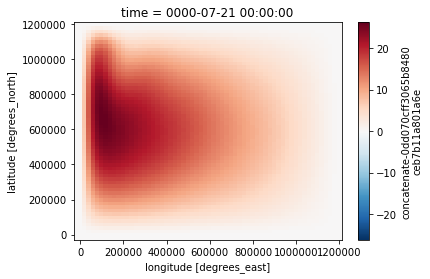

In [12]:
ψ.isel(time=-1).plot()
plt.show()

Compare this against the Stommmel model given by:

$$ \psi = \frac{\tau_0\pi}{\beta}\left(1 - \frac{x}{a} - e^{-x/(a\epsilon_S)}\right)\left(sin\frac{\pi y}{a}\right) $$

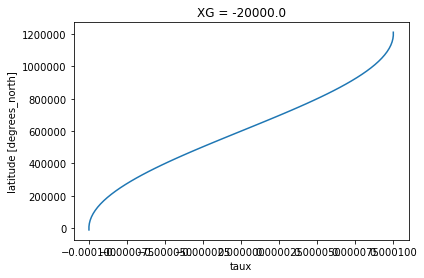

In [23]:
# read wind stress
dtype = '>f4'
# units N/m^2
taux_data = np.fromfile(f'{rundir}/windx_cosy.bin', dtype=dtype)
taux_data.shape = ds.rA.shape
rho0 = 1000.
ds['taux'] = ('YC', 'XG'), taux_data / rho0
ds.taux.isel(XG=0).plot(y='YC')

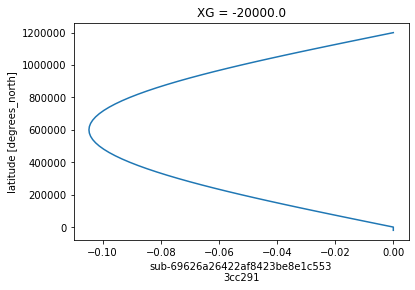

In [28]:
curl_tau=-1 * grid.diff(ds.taux * ds.dxC, 'Y', boundary='extend')
curl_tau.isel(XG=0).plot(y='YG')

In [30]:
τ0 = 0.1/1000
pi = np.pi
β = 1e-11 # s^-1 m^-1
x = ds.XG
a = float(ds.dxC.isel(YC=0,XG=slice(1,-1)).sum(dim='XG'))
r = 1e-6
ϵ = r / (β * a)
y = ds.YG

In [31]:
ψ_sto = (τ0 * pi / β) * (1 - (x/a) - np.exp((-1*x) / (a * ϵ))) * np.sin(pi * y / a) / 1e6

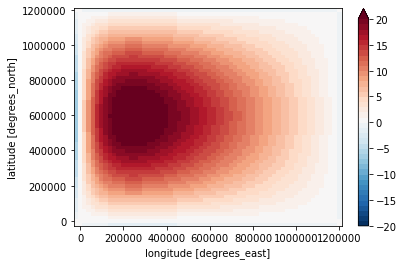

In [32]:
ψ_sto.plot(y='YG',levels=np.arange(-20,21,1))

#### 3) Diagnose all terms in the barotropic vorticity budget to the best of your ability. You may wish to use the extra diagnostics I have suggested in the github repo.

$$ \frac{\partial{Z}}{\partial{t}} + \vec{U}\cdotp\nabla Z + \beta V = A_h\nabla^2Z + curl_z(\vec{\tau}_S) + rZ$$

In [65]:
Z=grid.diff(ds.V * ds.dyC * 5000, 'X', boundary='extend') - grid.diff(
    ds.U * ds.dxC * 5000, 'Y', boundary='extend') / ds.rAz
term2 = ds.U * 5000 * grid.diff(Z, 'X',boundary='extend') + ds.V * 5000 * grid.diff(Z, 'Y',boundary='extend')

In [46]:
# question for rabernat: why do we multiply by dyC/dxC and then divide by rAz?

In [69]:
grid.diff(ds.V * ds.dyC * 5000, 'X', boundary='extend')

<xarray.DataArray 'sub-801dc5122b5a0df1ee7d0707f02ed00d' (time: 200, YG: 62, XG: 62)>
dask.array<sub, shape=(200, 62, 62), dtype=float32, chunksize=(1, 62, 61), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0000-01-02 00:00:00 ... 0000-07-21 00:00:00
  * YG       (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * XG       (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0

In [70]:
grid.diff(
    ds.U * ds.dxC * 5000, 'Y', boundary='extend')

<xarray.DataArray 'sub-1c54bef3afd48a769f79578c2bf6bad6' (time: 200, YG: 62, XG: 62)>
dask.array<sub, shape=(200, 62, 62), dtype=float32, chunksize=(1, 61, 62), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0000-01-02 00:00:00 ... 0000-07-21 00:00:00
  * YG       (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * XG       (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0

In [74]:
grid.diff(Z, 'X',boundary='extend')

KeyError: 'XY'